# Problem Statement

The online course provider X Education has a poor lead conversion rate. Only thirty percent of the daily leads generated become paying clients. The organization wants to find the most promising leads and raise the lead conversion rate to about 80% in order to increase efficiency. The objective is to develop a logistic regression model that will assist the sales team in prioritizing communication with potential prospects by assigning lead scores ranging from 0 to 100. The model should improve the entire lead conversion process and adjust to any future modifications specified in the company's requirements.

# Data Loading

In [1]:
#importing all the basic required packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#set the option to show all the columns in dataframe

pd.set_option('display.max_columns', None)

In [3]:
#ignore warning messages

warnings.filterwarnings('ignore')

In [4]:
#read the lead scoring dataset

leads_df1 = pd.read_csv(r"C:\Users\shubb\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [5]:
#check how the dataframe looks like

leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#check the shape of the dataframe

leads_df1.shape

(9240, 37)

In [7]:
#check the datatypes of the variables

leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [8]:
#find columns with only one type of values(imbalance)

for cols in leads_df1.columns[leads_df1.nunique() == 1]:
    print(cols)

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


In [9]:
#removing all these columns

leads_df = leads_df1.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], axis =1)

In [10]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [11]:
#removing 'Select' with null values as it is mentioned as 'Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value'

leads_df.replace('Select', np.nan, inplace=True)

In [12]:
#checking null values percent in each column

(leads_df.isnull().sum()/ len(leads_df)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
#removing columns like Prospect ID and Lead Number as they are unique to person.

leads_df = leads_df.drop(['Prospect ID','Lead Number'], axis =1)

In [14]:
#the columns Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score are having more than 45% null values and are assigned by sales team so removing them.

leads_df = leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis =1)

In [15]:
#checking null values percent in each column

(leads_df.isnull().sum()/ len(leads_df)) * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
#the columns 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile' and 'City' have high percentage of null values and doesn't seem much important and can't be imputed so removing them.

leads_df = leads_df.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City'], axis =1)

In [17]:
(leads_df.isnull().sum()/ len(leads_df)) * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [18]:
#imputing null values in country with 'not given'

leads_df['Country'] = leads_df['Country'].fillna('not given')

In [19]:
#imputing null values in specialization with 'not given'

leads_df['Specialization'] = leads_df['Specialization'].fillna('not given')

In [20]:
#imputing null values in What is your current occupation with 'not given'


leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('not given')

In [21]:
#imputing null values in What matters most to you in choosing a course with 'not given'

leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna('not given')

In [22]:
(leads_df.isnull().sum()/ len(leads_df)) * 100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [23]:
#removing all the rows with null values as it is very less

leads_df = leads_df.dropna()

In [24]:
(leads_df.isnull().sum()/ len(leads_df)) * 100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [25]:
leads_df.shape

(9074, 21)

In [26]:
#checking for all the value count in each column

for col in leads_df.columns:
    values_count = leads_df[col].value_counts()
    print(f"'{col}':")
    print(values_count)
    print("\n")

'Lead Origin':
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


'Lead Source':
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


'Do Not Email':
No     8358
Yes     716
Name: Do Not Email, dtype: int64


'Do Not Call':
No     9072
Yes       2
Name: Do Not Call, dtype: int64


'Converted':
0    5639
1    3435
Name: Converted, dtype: int64


'TotalVisits':


In [27]:
# columns 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Country' are highly imbalanced and so removing these columns.

leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations', 'Country'],axis = 1,inplace=True)

# EDA

In [28]:
#checking the data type of each column

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

UNIVARIATE ANALYSIS

In [29]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not given,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not given,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not given,Unemployed,Better Career Prospects,No,Modified


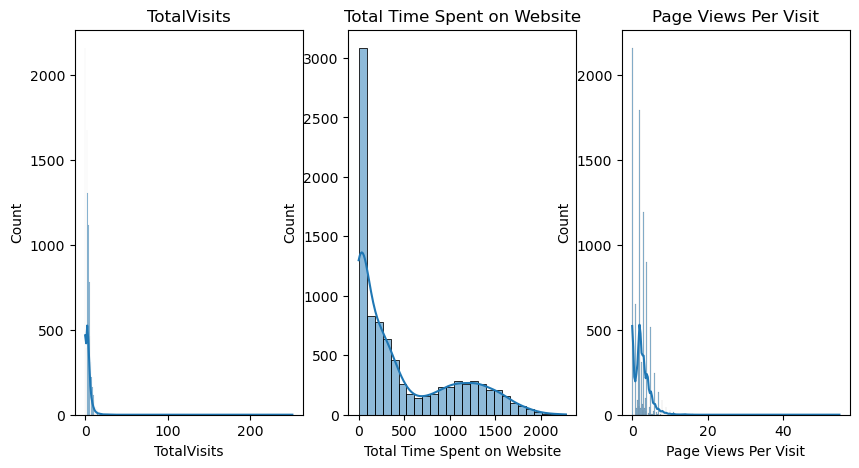

In [30]:
#Univariate analysis of numerical columns

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

for i, column in enumerate(num_cols):
    sns.histplot(leads_df[column], ax=axs[i], kde=True)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel(column)

plt.show()

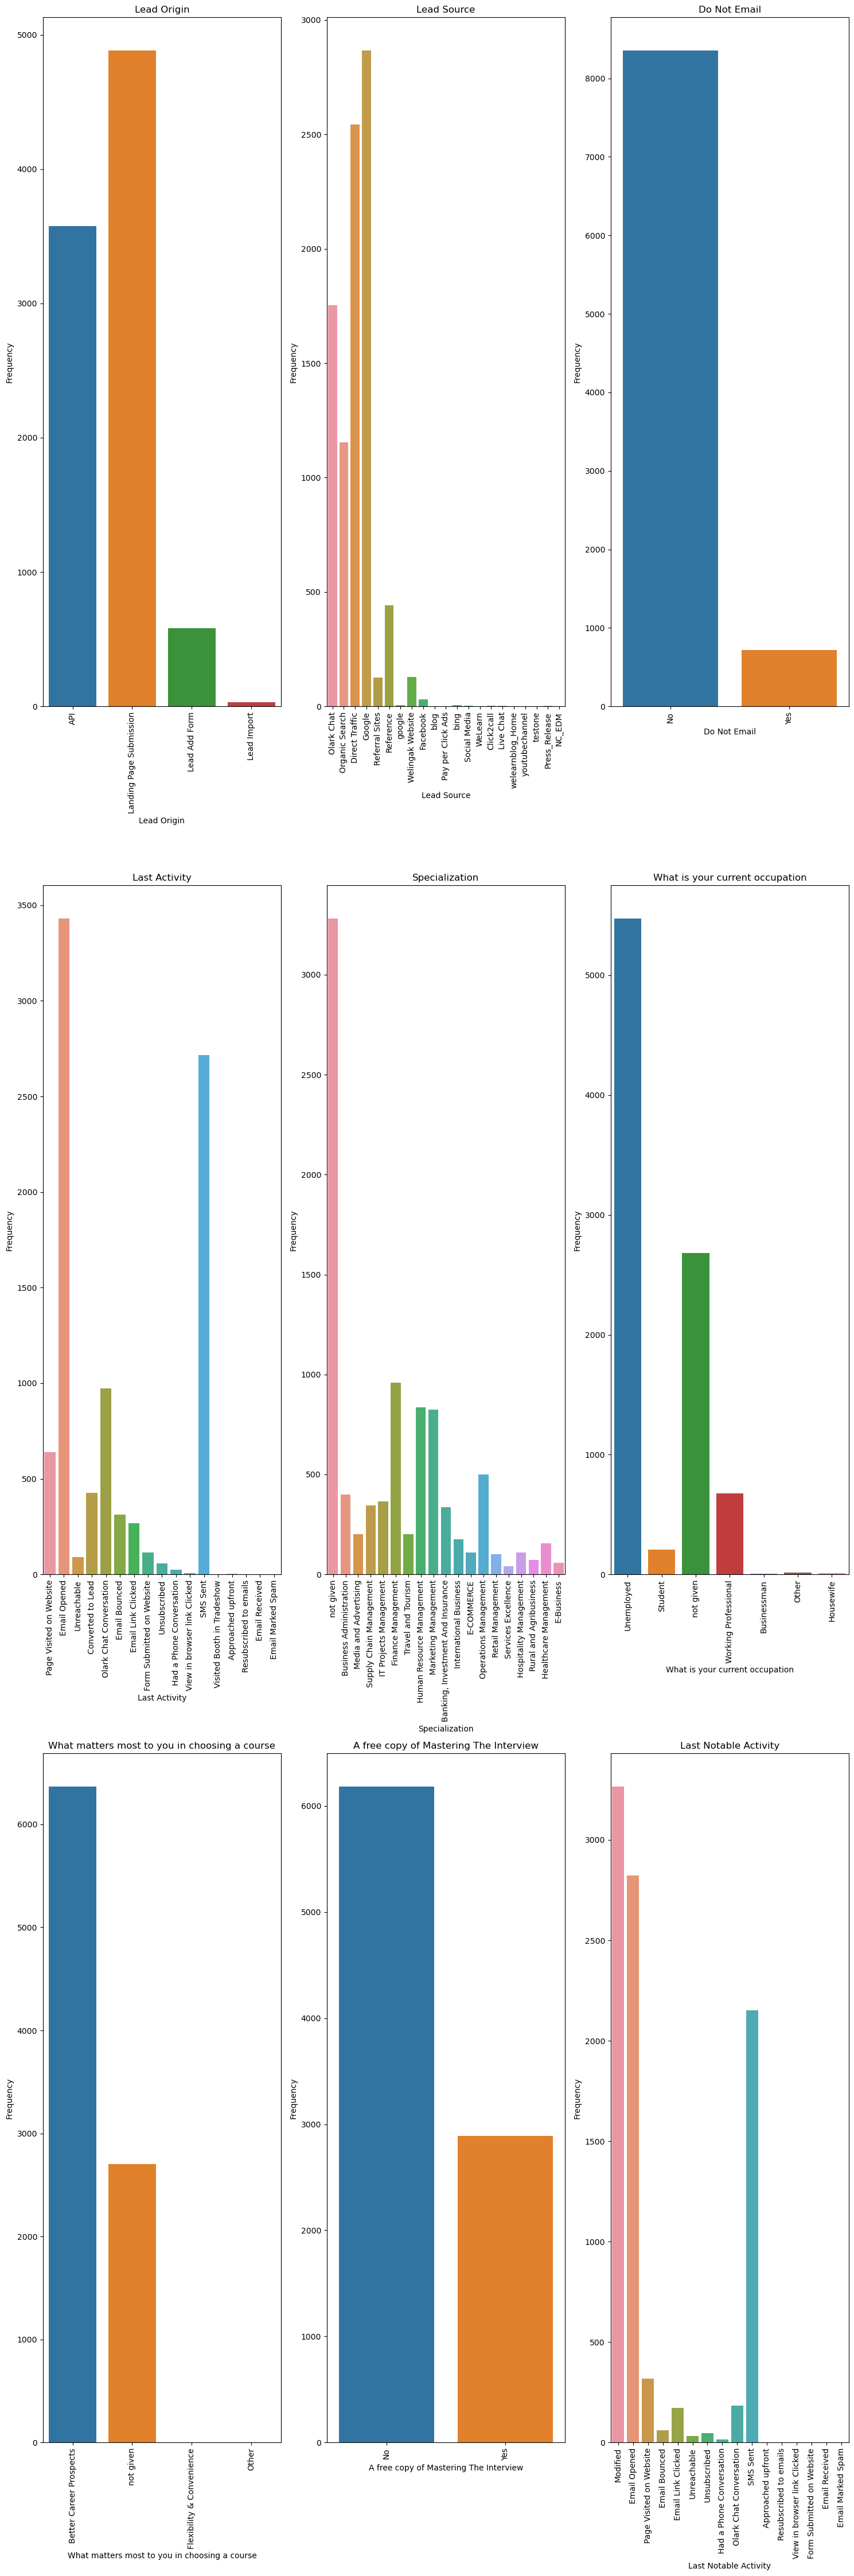

In [31]:
#Univariate analysis of categorical columns

cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 
                       'What is your current occupation', 'What matters most to you in choosing a course', 
                       'A free copy of Mastering The Interview', 'Last Notable Activity']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 45))

axs = axs.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(data=leads_df, x=column, ax=axs[i])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

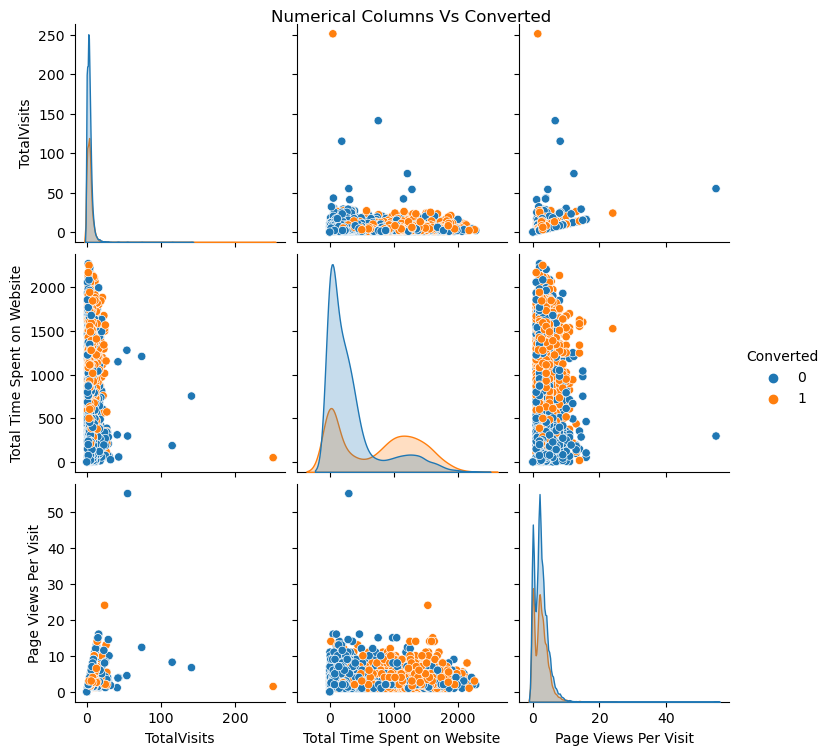

In [32]:
#Bivariate analysis of numerical columns with the 'Converted' variable

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

sns.pairplot(leads_df, vars=num_cols, hue='Converted', diag_kind='kde')
plt.suptitle('Numerical Columns Vs Converted', y = 1)
plt.show()

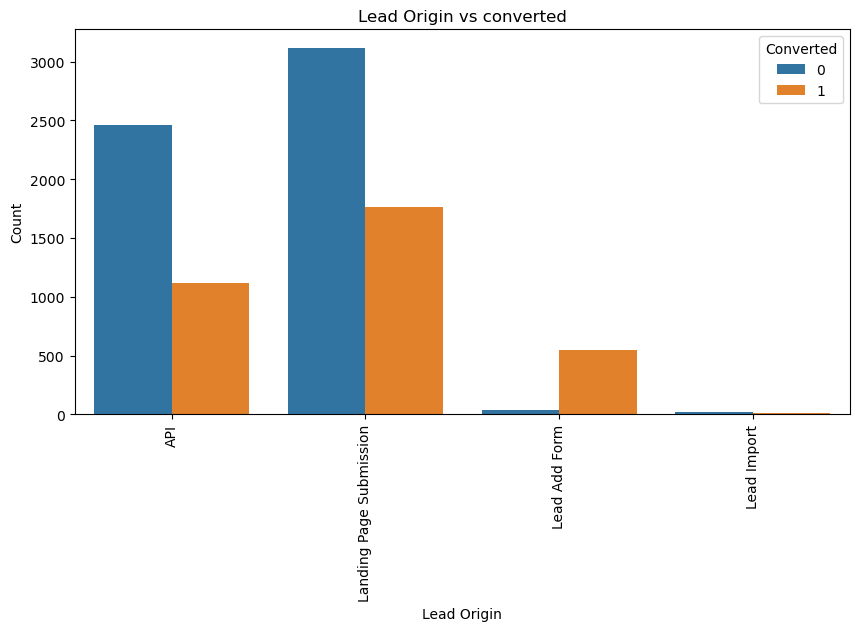

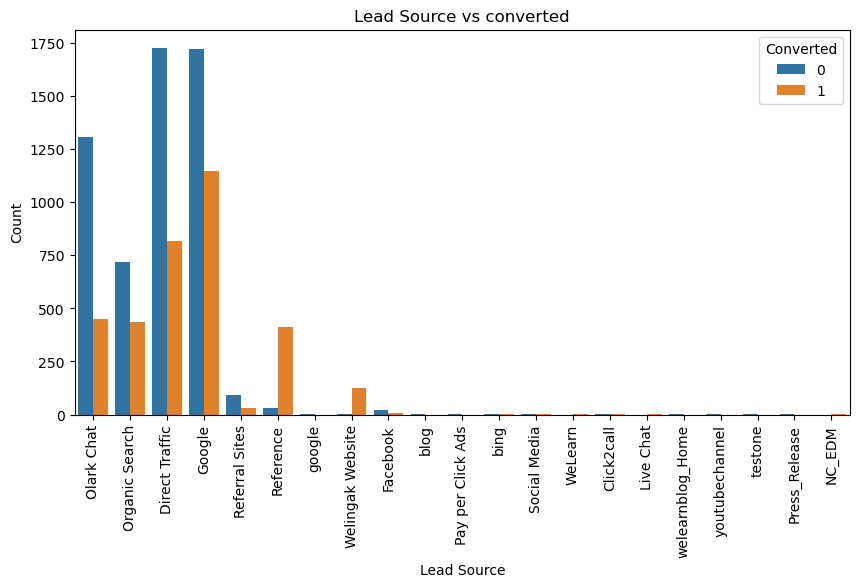

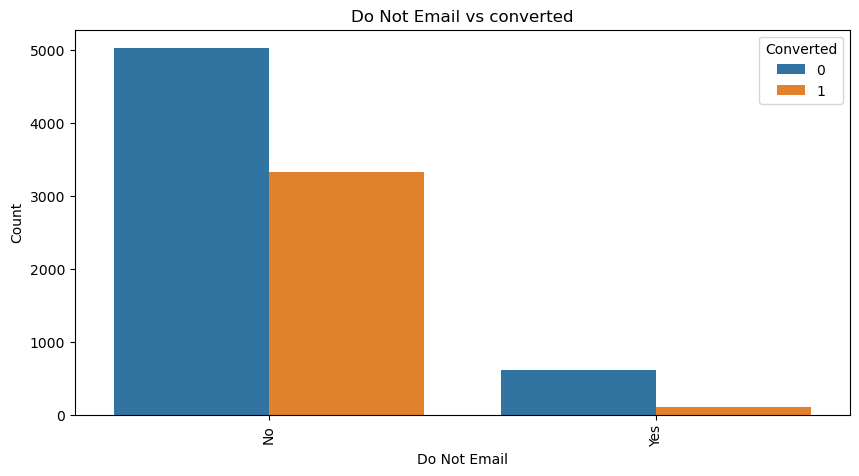

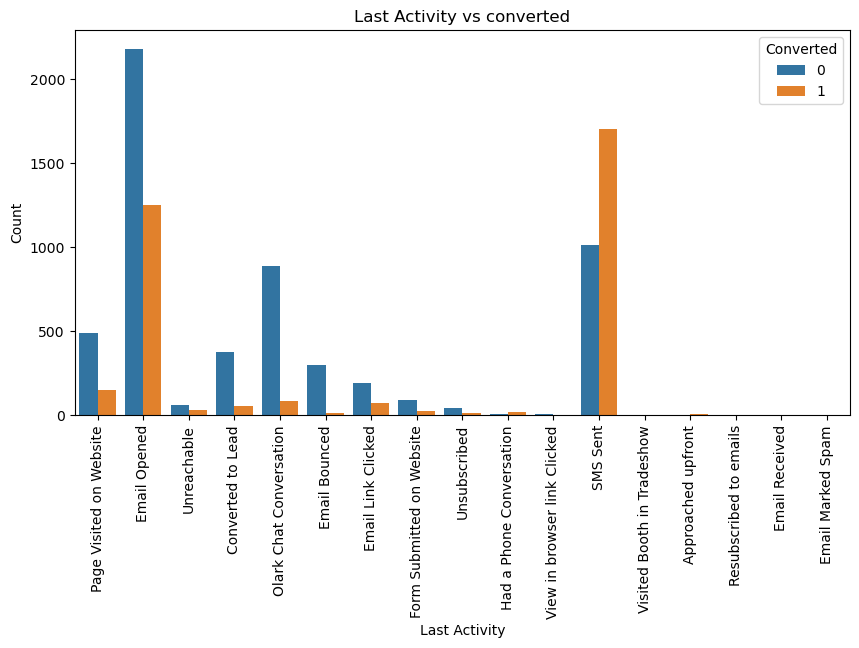

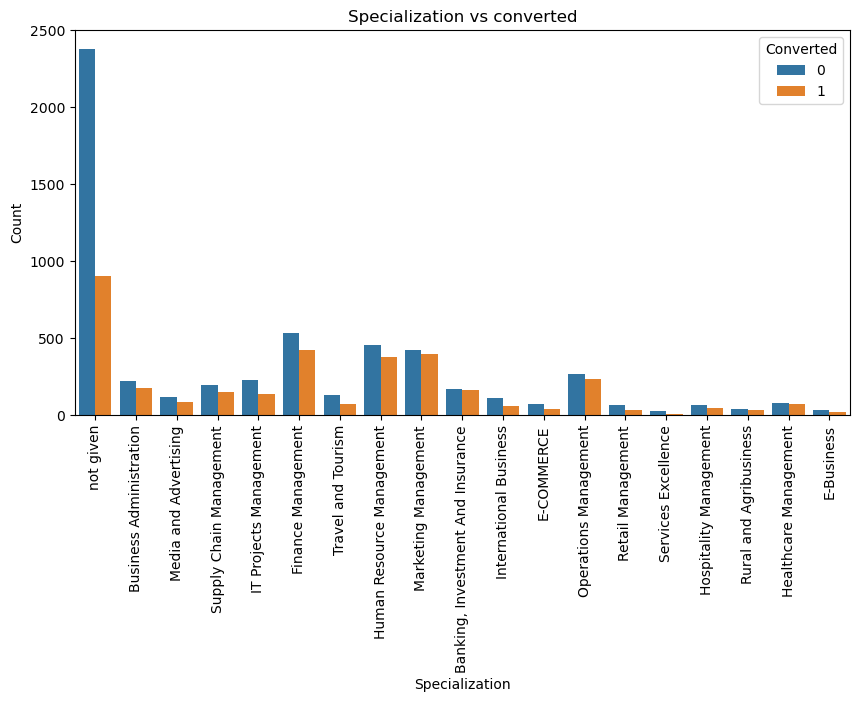

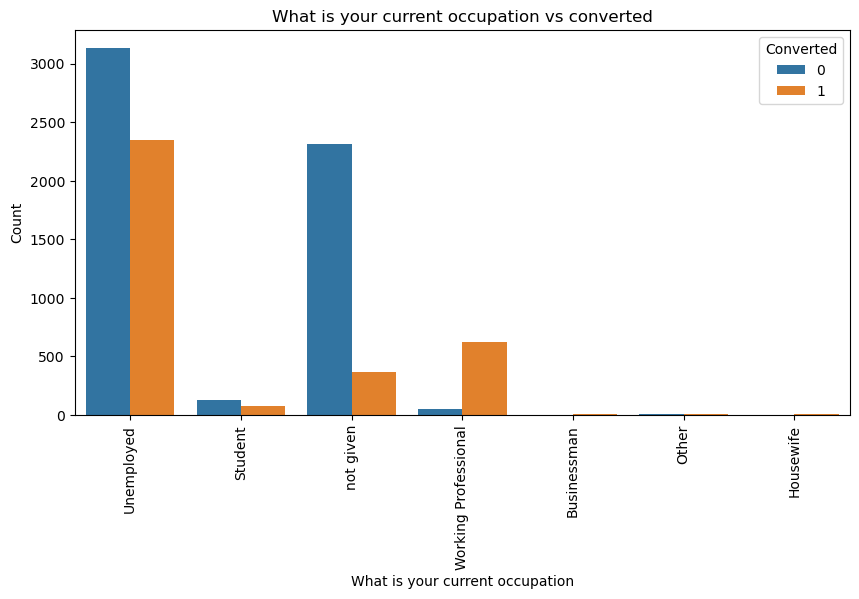

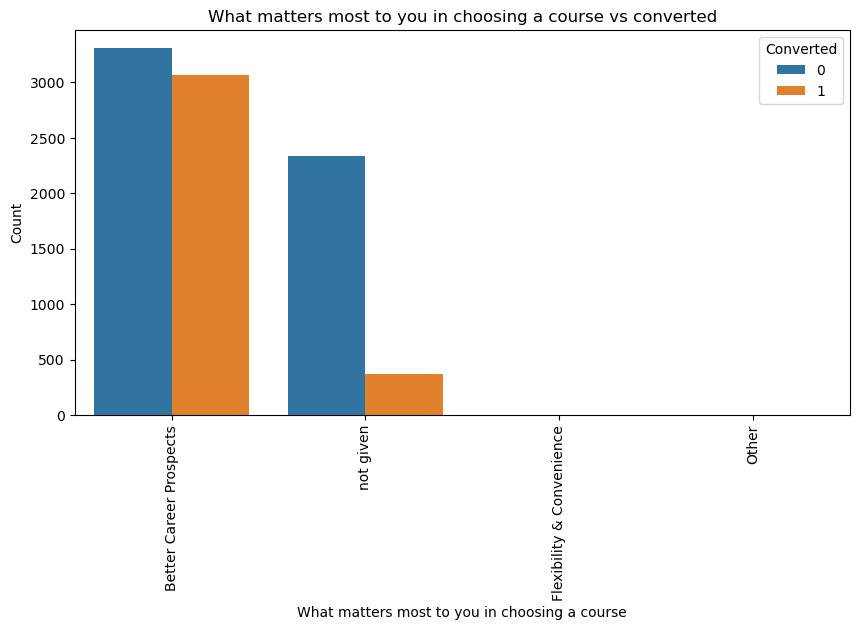

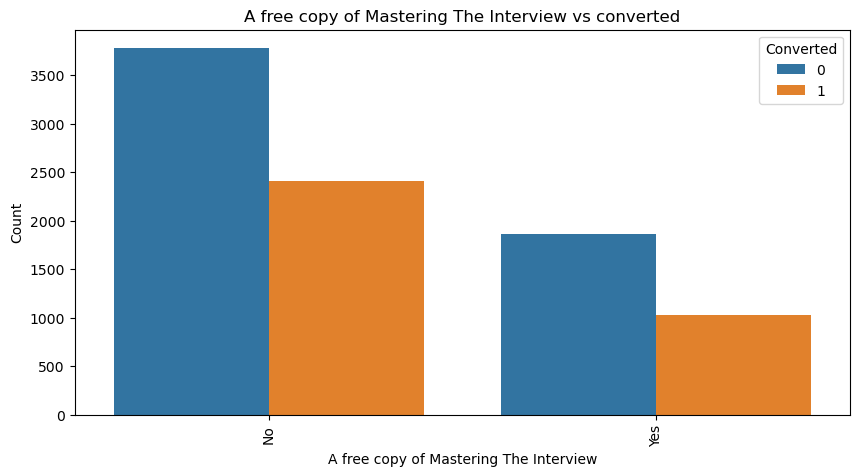

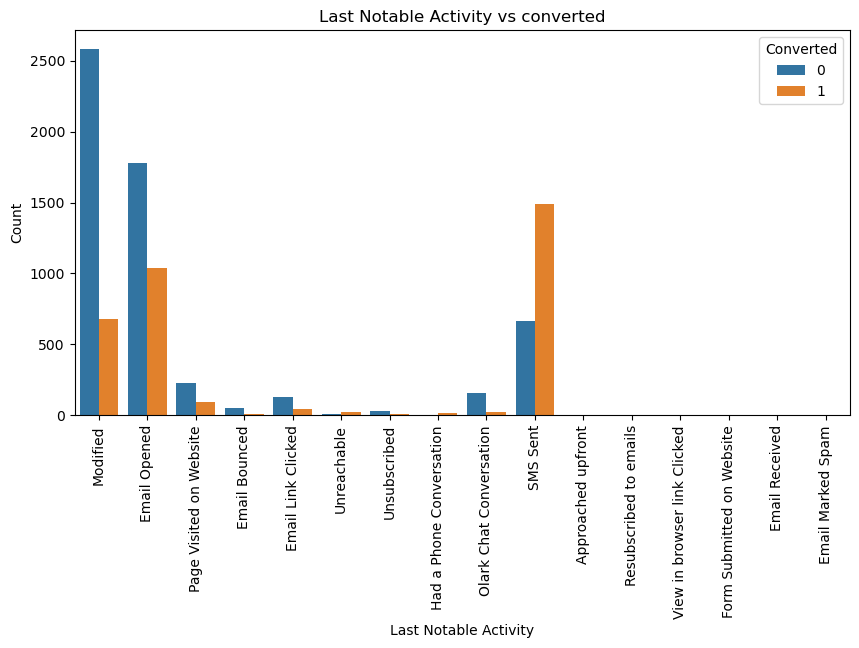

In [33]:
#Bivariate Analysis of categorical columns with the 'Converted' variable

cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 
                       'What is your current occupation', 'What matters most to you in choosing a course', 
                       'A free copy of Mastering The Interview', 'Last Notable Activity']

for column in cat_cols:
    if column != 'Converted':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, hue='Converted', data=leads_df)
        plt.title(f'{column} vs converted')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Converted')
        plt.xticks(rotation=90)
        plt.show()

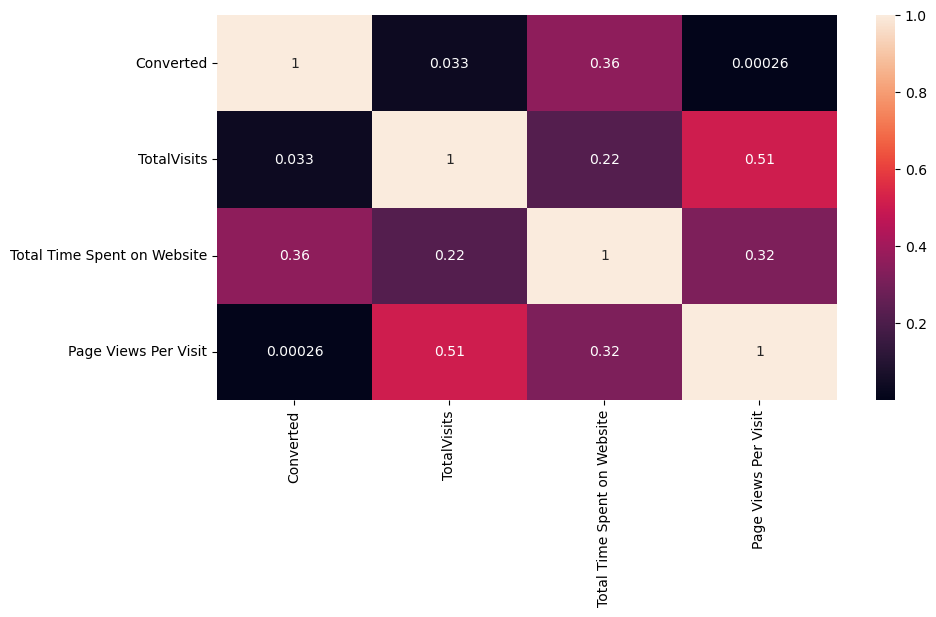

In [34]:
# Correlation between numerical varibles

plt.figure(figsize=(10,5))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

# Outlier Detection

In [35]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


Here, doesn't seem to be any significant outliers so no need of outlier removal.

# Creating Dummy variables using one hot encoding



In [36]:
#checking the data types

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

In [37]:
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization','What is your current occupation', 'What matters most to you in choosing a course', 'A free copy of Mastering The Interview', 'Last Notable Activity']

leads_df = pd.get_dummies(leads_df, columns=cols, drop_first=True)

In [38]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Test Train Splitting

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Creating the X

X = leads_df.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
#Creating y

y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
#splitting into train test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=49)

In [43]:
#print shapes of all the train and test data

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6351, 86)
X_test shape: (2723, 86)
y_train shape: (6351,)
y_test shape: (2723,)


# Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not given,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not given,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not given,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7869,0.161388,1.525278,0.724013,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2266,-0.115258,1.013089,0.272368,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1692,-0.945197,-0.887500,-1.082567,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4173,-0.391905,0.371023,-0.179277,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5145,-0.115258,0.799067,0.272368,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# RFE

In [46]:
#import packages for logistic regression and RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
estimator = LogisticRegression()    # creating an instance of logistic Regression class

selector = RFE(estimator, n_features_to_select=15)  # initializing the RFE object with LogisticRegression estimator

selector = selector.fit(X_train, y_train) # fitting the selector to data

selected_features = X_train.columns[selector.support_]   # selecting the top 15 features/columns 

print(selected_features)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')


# Model Building

In [48]:
#Function for building model and will be reused

def lr_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])   # creating constant for intercept
    lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    lre = lr.fit()
    print(lre.summary())
    return lre

In [49]:
#Function for calculating VIF and will be reused

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

# Model 1

We will start with all the top 15 features.

In [50]:
 top_15_cols = ['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified']

lr_model(top_15_cols)
get_vif(top_15_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.4
Date:                Sun, 14 Jan 2024   Deviance:                       5166.7
Time:                        13:03:09   Pearson chi2:                 6.38e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

# Model 2

'What is your current occupation_Housewife' column has higher p-value so dropping this column

In [51]:
 top_14_cols = ['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified']

lr_model(top_14_cols)
get_vif(top_14_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.2
Date:                Sun, 14 Jan 2024   Deviance:                       5174.5
Time:                        13:03:11   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

Now, both p-value as well as the VIF is under acceptable range.

The top three variables contributing most towards the probability of a lead getting converted appear to be:

- **Lead Origin_Lead Add Form: Coefficient = 3.4109**
- **Lead Source_Welingak Website: Coefficient = 2.7200**
- **What is your current occupation_Working Professional: Coefficient = 2.4632**

The top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion:

- **Lead Origin_Lead Add Form: Coefficient = 3.4109**
- **Lead Source_Welingak Website: Coefficient = 2.7200**
- **What is your current occupation_Working Professional: Coefficient = 2.4632**

# Prediction on Train dataset

In [52]:
# The final model

finalModel = sm.GLM(y_train,(sm.add_constant(X_train[top_14_cols])), family = sm.families.Binomial())
Model_Result = finalModel.fit()

In [53]:
# Predicting on train dataset

X_train_sm = sm.add_constant(X_train[top_14_cols])
y_train_pred = Model_Result.predict(X_train_sm)
y_train_pred

7869    0.411961
2266    0.979578
1692    0.134081
4173    0.959275
5145    0.457065
          ...   
8210    0.959132
8079    0.937798
3342    0.507104
5924    0.476041
444     0.061650
Length: 6351, dtype: float64

In [54]:
#We have to reshape it into an array for further usage

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.41196072, 0.97957777, 0.1340809 , ..., 0.50710436, 0.47604122,
       0.06165012])

In [55]:
# Created a new dataframe with the actual converted and probablilty

y_train_df = pd.DataFrame({'Actual_Converted':y_train.values, 'Conversion_Probability':y_train_pred, 'Lead ID': y_train.index})
y_train_df.head()

,Actual_Converted,Conversion_Probability,Lead ID
0,1,0.411961,7869
1,1,0.979578,2266
2,0,0.134081,1692
3,1,0.959275,4173
4,1,0.457065,5145


In [56]:
#for each cut-off, update the predicted value

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.411961,7869,1,1,1,1,1,0,0,0,0,0
1,1,0.979578,2266,1,1,1,1,1,1,1,1,1,1
2,0,0.134081,1692,1,1,0,0,0,0,0,0,0,0
3,1,0.959275,4173,1,1,1,1,1,1,1,1,1,1
4,1,0.457065,5145,1,1,1,1,1,0,0,0,0,0


In [57]:
#import metrics package

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [58]:
#calculate accuracy sensitivity and specificity for probability cut-offs

prob_df = pd.DataFrame(columns = ['cut-off','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for n in num:
    con_matrix = metrics.confusion_matrix(y_train_df.Actual_Converted, y_train_df[n])
    total=sum(sum(con_matrix))
    accuracy = (con_matrix[0,0]+con_matrix[1,1])/total
    specificity = con_matrix[0,0]/(con_matrix[0,0]+con_matrix[0,1])
    sensitivity = con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1])
    prob_df.loc[n] =[ n ,accuracy,sensitivity,specificity]
print(prob_df)

     cut-off  accuracy  sensitivity  specificity
0.0      0.0  0.379310     1.000000     0.000000
0.1      0.1  0.628090     0.973433     0.417047
0.2      0.2  0.756101     0.917808     0.657281
0.3      0.3  0.800976     0.875052     0.755708
0.4      0.4  0.812313     0.766293     0.840436
0.5      0.5  0.815462     0.697385     0.887620
0.6      0.6  0.809321     0.631797     0.917808
0.7      0.7  0.780822     0.512246     0.944952
0.8      0.8  0.760038     0.423412     0.965753
0.9      0.9  0.712329     0.259859     0.988838


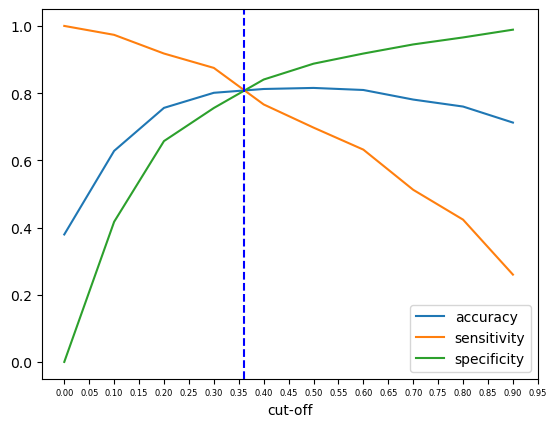

In [60]:
#draw curve of accuracy, sensitivity and specificity

prob_df.plot.line(x='cut-off', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=6)
plt.axvline(x=0.36, color='b', linestyle='--')
plt.show()

# We can see that the optimal cut-off is 0.36

In [62]:
#create PREDICTED column based on optimal cut-off.

y_train_df['Predicted'] = y_train_df.Conversion_Probability.map(lambda x: 1 if x > 0.36 else 0)
y_train_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,1,0.411961,7869,1,1,1,1,1,0,0,0,0,0,1
1,1,0.979578,2266,1,1,1,1,1,1,1,1,1,1,1
2,0,0.134081,1692,1,1,0,0,0,0,0,0,0,0,0
3,1,0.959275,4173,1,1,1,1,1,1,1,1,1,1,1
4,1,0.457065,5145,1,1,1,1,1,0,0,0,0,0,1


In [63]:
#dropping the unnecessary columns.

y_train_df.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)
y_train_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,Predicted
0,1,0.411961,7869,1
1,1,0.979578,2266,1
2,0,0.134081,1692,0
3,1,0.959275,4173,1
4,1,0.457065,5145,1


In [64]:
#creating confusion matrix

conf_mat = metrics.confusion_matrix(y_train_df.Actual_Converted, y_train_df.Predicted)
conf_mat

array([[3216,  726],
       [ 491, 1918]], dtype=int64)

In [65]:
#Checking the accuracy

metrics.accuracy_score(y_train_df.Actual_Converted, y_train_df.Predicted)

0.8083766336010078

In [66]:
#evaluating True Positive, False Positive, True Negative and False Negative from confusion matrix

TP = conf_mat[1,1]
FP = conf_mat[0,1]
TN = conf_mat[0,0]
FN = conf_mat[1,0]

In [67]:
# Evaluate sensitivity

TP/(TP+FN)

0.7961809879618099

In [68]:
# Evaluate specificity

TN/(TN+FP)

0.8158295281582952

In [69]:
#precision

TP/(TP+FP)

0.7254160363086233

In [70]:
#recall

TP/(TP+FN)

0.7961809879618099

# Precision-Recall Trade-off

In [71]:
# importing precision recall package

from sklearn.metrics import precision_recall_curve

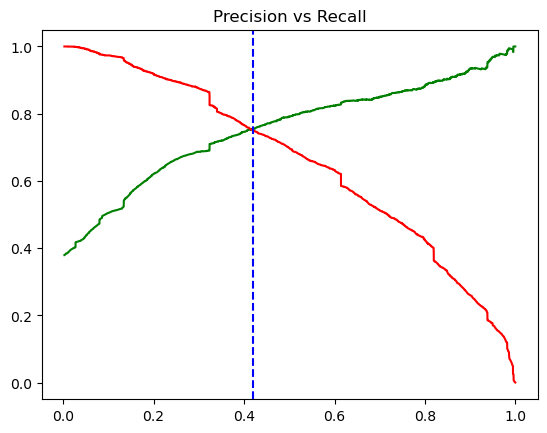

In [72]:
# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_df.Actual_Converted,y_train_df.Conversion_Probability)
plt.title('Precision vs Recall')
plt.plot(thresholds, p[:-1], "g-")  
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, color='b', linestyle='--')
plt.show()

We got cut-off of 0.42

In [76]:
#update PREDICTED column with the updated optimal cut-off.

y_train_df['Predicted'] = y_train_df.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,Predicted
0,1,0.411961,7869,0
1,1,0.979578,2266,1
2,0,0.134081,1692,0
3,1,0.959275,4173,1
4,1,0.457065,5145,1


In [77]:
#creating confusion matrix

conf_matt = metrics.confusion_matrix(y_train_df.Actual_Converted, y_train_df.Predicted)
conf_matt

array([[3355,  587],
       [ 603, 1806]], dtype=int64)

In [78]:
#Checking the accuracy

metrics.accuracy_score(y_train_df.Actual_Converted, y_train_df.Predicted)

0.812627932609038

In [79]:
#evaluating True Positive, False Positive, True Negative and False Negative from confusion matrix

TP = conf_matt[1,1]
FP = conf_matt[0,1]
TN = conf_matt[0,0]
FN = conf_matt[1,0]

In [80]:
# Evaluate sensitivity

TP/(TP+FN)

0.7496886674968867

In [81]:
# Evaluate specificity

TN/(TN+FP)

0.8510908168442415

In [82]:
#precision

TP/(TP+FP)

0.7547012118679481

In [83]:
#recall

TP/(TP+FN)

0.7496886674968867

# ROC Curve

In [84]:
#define function for ROC Curve

def plot_roc_curve(actual, predicted):
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, predicted)
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc='lower right')
    plt.show()

    return None

In [85]:
#calculate the false positive rate (fpr), true positive rate (tpr), and thresholds based on training data.

fpr, tpr, thresholds = metrics.roc_curve( y_train_df.Actual_Converted, y_train_df.Conversion_Probability, drop_intermediate = False )


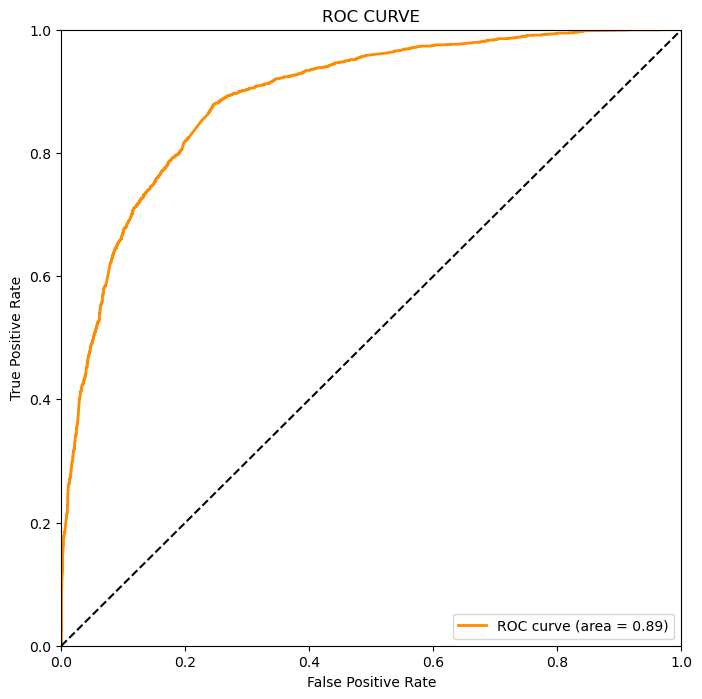

In [86]:
#plot the ROC curve

plot_roc_curve(y_train_df.Actual_Converted, y_train_df.Conversion_Probability)

AUC is 0.89, which means the model has a good discriminatory power.

# Prediction on test dataset

In [87]:
#scaling on test dataset

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test = X_test[top_14_cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,What matters most to you in choosing a course_not given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
2008,-0.887500,0,1,0,0,0,0,1,0,0,1,0,0,1
3393,-0.587503,0,0,0,0,0,0,0,0,0,1,0,1,0
4168,-0.066167,0,0,0,0,0,0,0,0,1,0,0,0,0
3057,0.508216,0,0,0,0,0,0,0,0,0,0,0,1,0
3971,2.171002,0,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
#adding constant for the test dataset

X_test_sm = sm.add_constant(X_test[top_14_cols])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,What matters most to you in choosing a course_not given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
2008,1.0,-0.887500,0,1,0,0,0,0,1,0,0,1,0,0,1
3393,1.0,-0.587503,0,0,0,0,0,0,0,0,0,1,0,1,0
4168,1.0,-0.066167,0,0,0,0,0,0,0,0,1,0,0,0,0
3057,1.0,0.508216,0,0,0,0,0,0,0,0,0,0,0,1,0
3971,1.0,2.171002,0,0,0,0,0,0,0,0,0,1,0,0,0


In [89]:
#predicting on the test dataset

y_test_pred = Model_Result.predict(X_test_sm)
y_test_pred 

2008    0.027546
3393    0.063312
4168    0.935541
3057    0.412601
3971    0.826706
          ...   
3336    0.014024
8810    0.674969
7090    0.395497
1604    0.027546
6439    0.175911
Length: 2723, dtype: float64

In [90]:
#reshaping it

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.02754565, 0.0633116 , 0.93554068, ..., 0.39549696, 0.02754565,
       0.17591121])

In [91]:
# Created a new dataframe with the actual converted and probablilty

y_test_df= pd.DataFrame({'Actual_Converted':y_test.values, 'Conversion_Probability':y_test_pred, 'Lead ID': y_test.index})
y_test_df.head()

,Actual_Converted,Conversion_Probability,Lead ID
0,0,0.027546,2008
1,0,0.063312,3393
2,1,0.935541,4168
3,0,0.412601,3057
4,1,0.826706,3971


In [92]:
y_test_df['Predicted'] = y_test_df.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_test_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,Predicted
0,0,0.027546,2008,0
1,0,0.063312,3393,0
2,1,0.935541,4168,1
3,0,0.412601,3057,0
4,1,0.826706,3971,1


In [93]:
#calculating accuracy score

metrics.accuracy_score(y_test_df['Actual_Converted'], y_test_df.Predicted)

0.8226221079691517

In [94]:
#creating confusion matrix

conf_matrix = metrics.confusion_matrix(y_test_df['Actual_Converted'], y_test_df.Predicted)
conf_matrix

array([[1461,  236],
       [ 247,  779]], dtype=int64)

In [95]:
#evaluating True Positive, False Positive, True Negative and False Negative from confusion matrix

TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
TN = conf_matrix[0,0]
FN = conf_matrix[1,0]

In [96]:
# Evaluate sensitivity

TP/(TP+FN)

0.7592592592592593

In [97]:
# Evaluate specificity

TN/(TN+FP)

0.8609310548025928

In [98]:
# Calculate Precision

TP/(TP+FP)

0.767487684729064

In [99]:
# Calculate Recall

TP/(TP+FN)

0.7592592592592593

In [100]:
y_test_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,Predicted
0,0,0.027546,2008,0
1,0,0.063312,3393,0
2,1,0.935541,4168,1
3,0,0.412601,3057,0
4,1,0.826706,3971,1


# Assigning Lead Score

In [101]:
y_test_df['Lead Score']=y_test_df['Conversion_Probability'].apply(lambda x:round(x*100))
y_test_df.head()

,Actual_Converted,Conversion_Probability,Lead ID,Predicted,Lead Score
0,0,0.027546,2008,0,3
1,0,0.063312,3393,0,6
2,1,0.935541,4168,1,94
3,0,0.412601,3057,0,41
4,1,0.826706,3971,1,83
